<a href="https://colab.research.google.com/github/minkchoii/Stylegan2-ada/blob/main/Stylegan2_ada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch
!pip install ninja


Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 131 (delta 0), reused 1 (delta 0), pack-reused 128 (from 1)
Receiving objects: 100% (131/131), 1.13 MiB | 3.59 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-ada-pytorch/stylegan2-ada-pytorch/stylegan2-ada-pytorch


In [17]:
import torch
import numpy as np
from PIL import Image
import dnnlib
import legacy


In [18]:
!wget -c https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl


--2024-11-06 12:36:37--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 216.137.39.37, 216.137.39.42, 216.137.39.20, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|216.137.39.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M   222MB/s    in 1.6s    

2024-11-06 12:36:40 (222 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]



In [19]:
network_pkl = "ffhq.pkl"
device = torch.device('cuda')

with dnnlib.util.open_url(network_pkl) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)  # Load generator


In [20]:
# 라텐트 벡터 두 개 생성
z1 = torch.from_numpy(np.random.randn(1, G.z_dim)).to(device)
z2 = torch.from_numpy(np.random.randn(1, G.z_dim)).to(device)

# 보간 개수 설정
num_steps = 10
interpolations = []

for i in range(num_steps):
    # 보간 비율 계산
    alpha = i / (num_steps - 1)
    z_interp = (1 - alpha) * z1 + alpha * z2  # z1에서 z2로 보간

    # 이미지를 생성하고 저장
    img = G(z_interp, None, truncation_psi=0.5, noise_mode='const')
    img = (img + 1) * (255/2)
    img = img.permute(0, 2, 3, 1).cpu().numpy().astype(np.uint8)
    interpolations.append(Image.fromarray(img[0]))


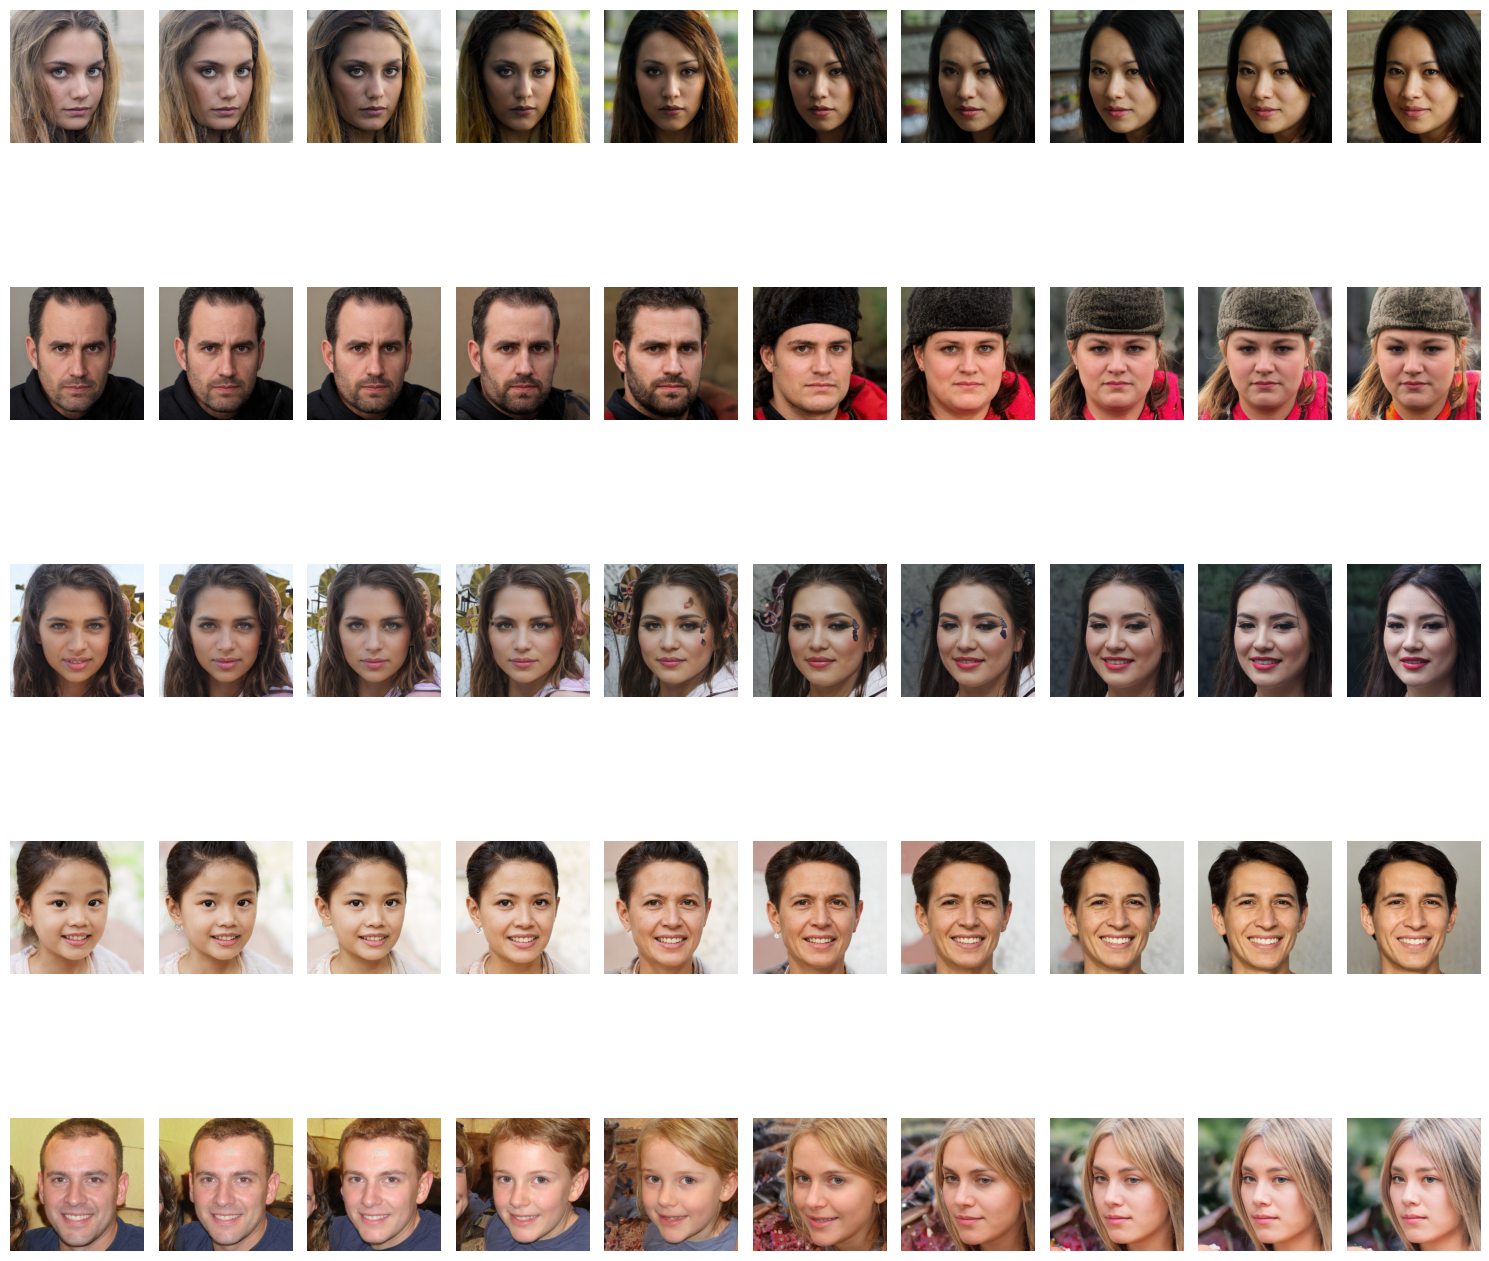

In [21]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 설정 변수
num_pairs = 5  # 라텐트 벡터 쌍의 개수 (다양한 이미지 쌍의 수)
num_steps = 10  # 각 쌍에서 보간할 단계 수
num_columns = 10  # 한 줄에 표시할 이미지 개수

# 보간 결과 저장 리스트
all_interpolations = []

# 라텐트 벡터 쌍 생성 및 보간 수행
for _ in range(num_pairs):
    z1 = torch.from_numpy(np.random.randn(1, G.z_dim)).to(device)
    z2 = torch.from_numpy(np.random.randn(1, G.z_dim)).to(device)

    # 각 쌍에 대해 보간된 이미지 저장
    interpolations = []
    for i in range(num_steps):
        alpha = i / (num_steps - 1)
        z_interp = (1 - alpha) * z1 + alpha * z2
        img = G(z_interp, None, truncation_psi=0.7, noise_mode='random')
        img = (img + 1) * (255 / 2)
        img = img.permute(0, 2, 3, 1).cpu().numpy().astype(np.uint8)
        interpolations.append(Image.fromarray(img[0]))
    all_interpolations.append(interpolations)

# 출력
fig, axes = plt.subplots(num_pairs, num_columns, figsize=(15, 3 * num_pairs))

for row in range(num_pairs):
    for col in range(num_columns):
        axes[row, col].imshow(all_interpolations[row][col])
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()


